# Dimonds 

https://www.kaggle.com/datasets/shivam2503/diamonds

Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)


In [34]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np

In [3]:
df=pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# Let's explore the data

# [53940 rows x 11 columns]
# no missing values 
# 3 objects need to be encoded 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
# How many colours do we have ?
df["color"].unique()  #we have 7 different colours

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
# How many cuts do we have ?
df["cut"].unique()  #we have 5 different cuts

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

<Axes: xlabel='color', ylabel='price'>

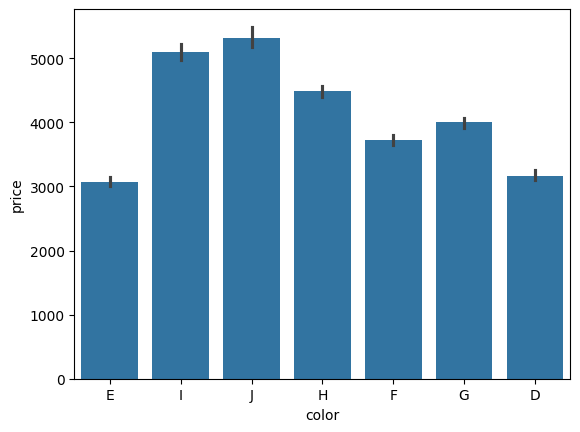

In [13]:
# let's see the relation between the color and the price
# sns.plot(x=)
sns.barplot(x='color', y='price', data=df)


<Axes: xlabel='cut', ylabel='price'>

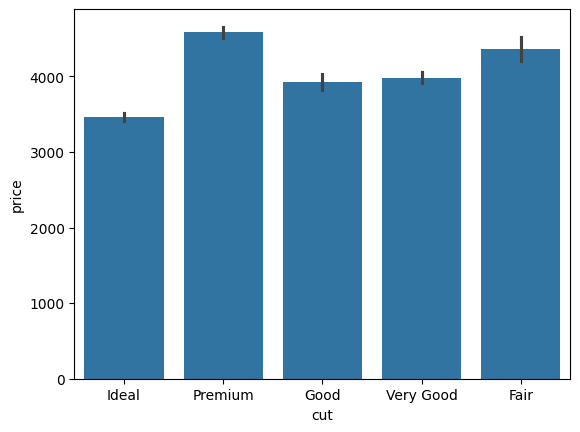

In [14]:
# let's see the relation between cuts and price
sns.barplot(x='cut', y='price', data=df)


In [15]:
# create new column the volume of the dimoind 

df["volume"]=df["x"]*df["y"]*df["z"]
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [19]:
# sns.pairplot(df)

<Axes: xlabel='volume', ylabel='price'>

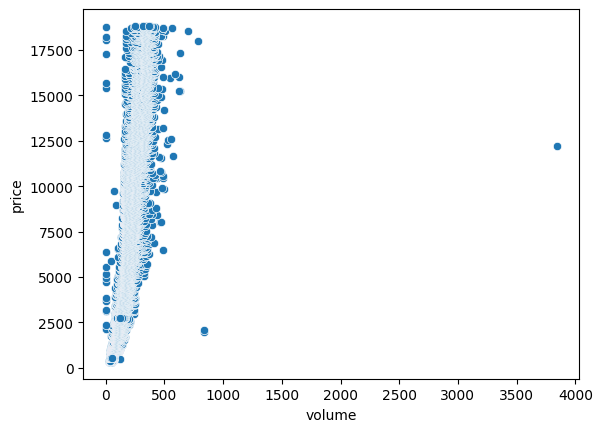

In [21]:
sns.scatterplot(x="volume",y="price",data=df)



In [ ]:
# let's drop outliers

# z_scores = np.abs((df['price'] - df['column_name'].mean()) / df['column_name'].std())


In [23]:
# let's encode the objects 
df_hot_encoded=pd.get_dummies(df)
df_hot_encoded.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,volume,cut_Fair,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,38.202030,False,...,False,False,False,False,False,True,False,False,False,False
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,34.505856,False,...,False,False,False,False,True,False,False,False,False,False
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,38.076885,False,...,False,False,False,False,False,False,True,False,False,False
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,46.724580,False,...,True,False,False,False,False,False,False,True,False,False
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,51.917250,False,...,False,True,False,False,False,True,False,False,False,False


In [24]:
X=df_hot_encoded.drop(["price"],axis=1)
X.head()

,Unnamed: 0,carat,depth,table,x,y,z,volume,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,3.95,3.98,2.43,38.202030,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2,0.21,59.8,61.0,3.89,3.84,2.31,34.505856,False,False,...,False,False,False,False,True,False,False,False,False,False
2,3,0.23,56.9,65.0,4.05,4.07,2.31,38.076885,False,True,...,False,False,False,False,False,False,True,False,False,False
3,4,0.29,62.4,58.0,4.20,4.23,2.63,46.724580,False,False,...,True,False,False,False,False,False,False,True,False,False
4,5,0.31,63.3,58.0,4.34,4.35,2.75,51.917250,False,True,...,False,True,False,False,False,True,False,False,False,False


In [26]:
y=df_hot_encoded["price"]
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape

((43152, 28), (43152,), (10788, 28))

In [37]:
X = X.astype(np.float32)
X.head()
tf.squeeze(X)

<tf.Tensor: shape=(53940, 28), dtype=float32, numpy=
array([[1.0000e+00, 2.3000e-01, 6.1500e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.1000e-01, 5.9800e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 2.3000e-01, 5.6900e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [5.3938e+04, 7.0000e-01, 6.2800e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.3939e+04, 8.6000e-01, 6.1000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.3940e+04, 7.5000e-01, 6.2200e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], dtype=float32)>

In [40]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[None,43152,28])
])

model_1.compile(loss=tf.keras.losses.mae,metrics=["mae"] ,optimizer=tf.keras.optimizers.SGD())

model_1.fit(X,y,epochs=100)


Epoch 1/100
1686/1686 [==============================] - 3s 1ms/step - loss: 3670869.2500 - mae: 3670869.2500
Epoch 2/100
1686/1686 [==============================] - 2s 1ms/step - loss: 3672546.7500 - mae: 3672546.7500
Epoch 3/100
1686/1686 [==============================] - 2s 1ms/step - loss: 3675311.0000 - mae: 3675311.0000
Epoch 4/100
1686/1686 [==============================] - 2s 1ms/step - loss: 3671720.5000 - mae: 3671720.5000
Epoch 5/100
1686/1686 [==============================] - 2s 1ms/step - loss: 3673407.2500 - mae: 3673407.2500
Epoch 6/100
1686/1686 [==============================] - 2s 1ms/step - loss: 3678672.0000 - mae: 3678672.0000
Epoch 7/100
1686/1686 [==============================] - 2s 1ms/step - loss: 3673998.0000 - mae: 3673998.0000
Epoch 8/100
1686/1686 [==============================] - 2s 1ms/step - loss: 3674414.0000 - mae: 3674414.0000
Epoch 9/100
1686/1686 [==============================] - 2s 1ms/step - loss: 3673157.2500 - mae: 3673157.2500
Epoch 10/1

KeyboardInterrupt: 